In [0]:
#Import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import io
import time
import datetime
import time
plt.style.use("ggplot")

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [0]:
#Import sklearn libraries
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

In [0]:
data = pd.read_excel('card transactions.xlsx')

<h3> Summary Statistics & EDA </h3>

In [0]:
data.dtypes

Unnamed: 0             int64
Recnum                object
Cardnum               object
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip             object
Transtype             object
Amount               float64
Fraud                 object
dtype: object

In [0]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [0]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000,96753.000,92097.000,96753.000,96753.000
mean,48377.000,5142201786.822,44706.597,427.886,0.011
std,27930.330,55670.838,28369.538,10006.140,0.104
min,1.000,5142110002.000,1.000,0.010,0.000
25%,24189.000,5142152067.000,20855.000,33.480,0.000
50%,48377.000,5142195612.000,38118.000,137.980,0.000
75%,72565.000,5142246089.000,63103.000,428.200,0.000
max,96753.000,5142847398.000,99999.000,3102045.530,1.000


In [0]:
data.dtypes
data['Recnum'] = data['Recnum'].astype('object')
data['Cardnum'] = data['Cardnum'].astype('object')
data['Fraud'] = data['Fraud'].astype('object')
data['Merch zip'] = data['Merch zip'].astype('object')
#datetimeformat = '%Y-%m-%d %H:%M:%S'
#data['Date'] = pd.to_datetime(data['Date'], datetimeformat)

In [0]:
data['Date'].tail(10)

96743   2010-12-31
96744   2010-12-31
96745   2010-12-31
96746   2010-12-31
96747   2010-12-31
96748   2010-12-31
96749   2010-12-31
96750   2010-12-31
96751   2010-12-31
96752   2010-12-31
Name: Date, dtype: datetime64[ns]

In [0]:
data.dtypes

Recnum                       object
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                        object
dtype: object

In [0]:
#Missing Value Count
MissingValuesTable = data.isnull().sum().reset_index().rename(columns = {0: 'Missing_Values_Count'})
newTable = MissingValuesTable

In [0]:
#Fraud transactions %
data['Fraud'].value_counts()[1]/data['Fraud'].shape[0]

0.010945397041952187

In [0]:
#To create table for summary statistics and merge with base table
def createTable(TableLeft, funcOutput, name):
    TableRight = funcOutput.reset_index().rename(columns = {0: name})
    MergedTable = TableLeft.merge(TableRight, on = 'index', how = 'inner')
    return MergedTable   

In [0]:
#Computing summary statistics
RecordsWithValue = (data.shape[0] - data.isnull().sum())
PercPop = ((data.shape[0] - data.isnull().sum())/data.shape[0])
nunique = data.nunique()
dtypes = data.dtypes

func = [(RecordsWithValue,'Records_with_values_count'), (PercPop, 'Percent_Populated'), (nunique,'Unique_Values_Count'), (dtypes, 'Field_Type')]

for funcOutput, name in func:
    newTable = createTable(newTable, funcOutput, name)

In [0]:
newTable

,Variables,Missing_Values_Count,Records_with_values_count,Percent_Populated,Unique_Values_Count,Field_Type,Zeroes_count
0,Recnum,0,96753,1.000,96753,object,0
1,Cardnum,0,96753,1.000,1645,object,0
2,Date,0,96753,1.000,365,datetime64[ns],0
3,Merchnum,3375,93378,0.965,13091,object,0
4,Merch description,0,96753,1.000,13126,object,0
5,Merch state,1195,95558,0.988,227,object,0
6,Merch zip,4656,92097,0.952,4567,object,0
7,Transtype,0,96753,1.000,4,object,0
8,Amount,0,96753,1.000,34909,float64,0
9,Fraud,0,96753,1.000,2,object,95694


In [0]:
data.describe()

,Amount
count,96753.000
mean,427.886
std,10006.140
min,0.010
25%,33.480
50%,137.980
75%,428.200
max,3102045.530


In [0]:
#Count zeroes in each column
ZeroesDict = {}
for col in data.columns.tolist():
    ZeroesDict[col] = data[data[col] == 0].shape[0]
ZeroesDF = pd.DataFrame([ZeroesDict]).transpose().reset_index().rename(columns = {0: 'Zeroes_count'})
newTable = newTable.merge(ZeroesDF, how = 'inner', on = 'index')
newTable = newTable.rename(columns = {'index': 'Variables'})

In [0]:
newTable.to_csv('Card_Transactions_Summary_Statistics.csv')

In [0]:
data.dtypes

Recnum                       object
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                        object
dtype: object

In [0]:
Cols = data.columns.tolist()
Cols.remove('Recnum')
Cols.remove('Date')
print (Cols)

['Cardnum', 'Merchnum', 'Merch description', 'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud']


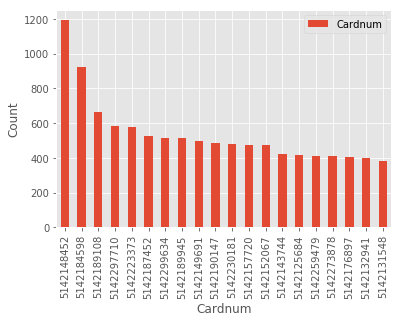

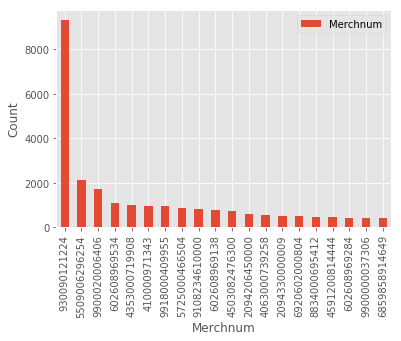

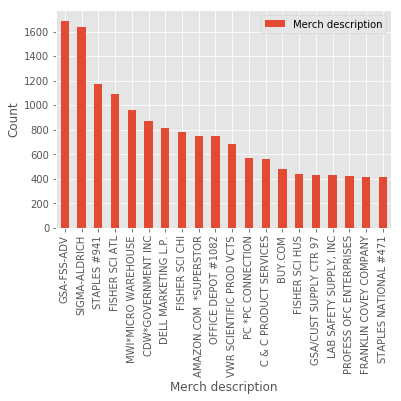

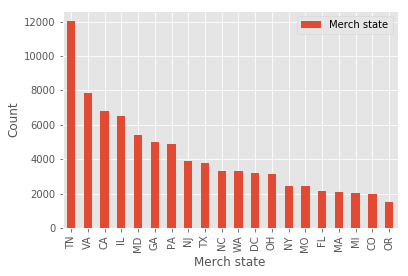

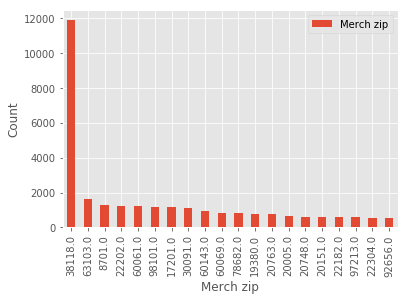

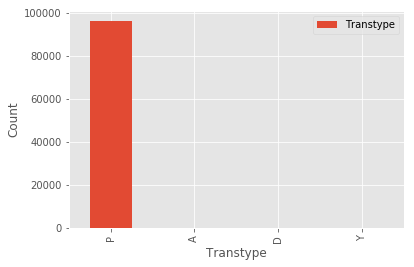

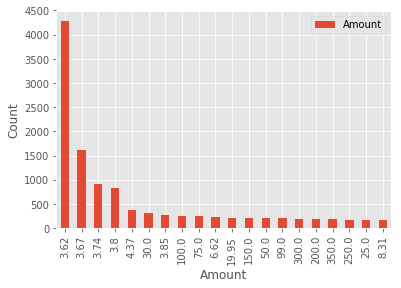

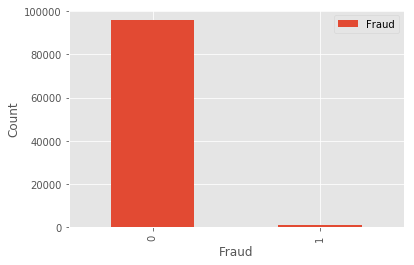

In [0]:
for col in Cols:
    DF = pd.DataFrame(data[col].value_counts().sort_values(ascending = False).head(20))
    DF.plot(kind = 'bar') 
    plt.xlabel(col)
    plt.ylabel('Count')

In [0]:
data.apply(lambda x: x.value_counts().sort_values(ascending = False).head(1))
    

/Users/User/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7356: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
1,1.000,nan,nan,nan,nan,nan,nan,nan,nan,nan
5142148452,nan,1192.000,nan,nan,nan,nan,nan,nan,nan,nan
2010-02-28 00:00:00,nan,nan,684.000,nan,nan,nan,nan,nan,nan,nan
930090121224,nan,nan,nan,9310.000,nan,nan,nan,nan,nan,nan
GSA-FSS-ADV,nan,nan,nan,nan,1688.000,nan,nan,nan,nan,nan
TN,nan,nan,nan,nan,nan,12035.000,nan,nan,nan,nan
38118.0,nan,nan,nan,nan,nan,nan,11868.000,nan,nan,nan
P,nan,nan,nan,nan,nan,nan,nan,96398.000,nan,nan
3.62,nan,nan,nan,nan,nan,nan,nan,nan,4283.000,nan
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,95694.000


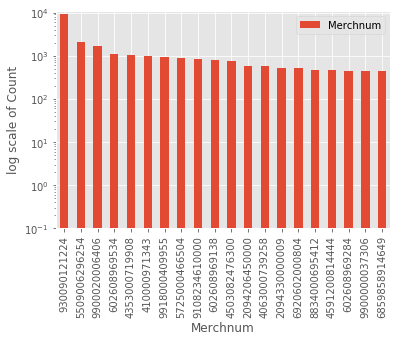

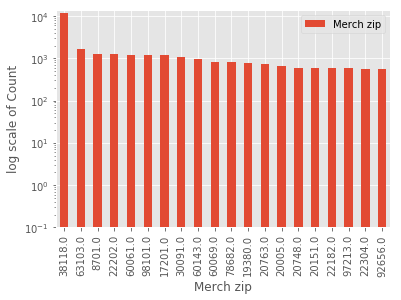

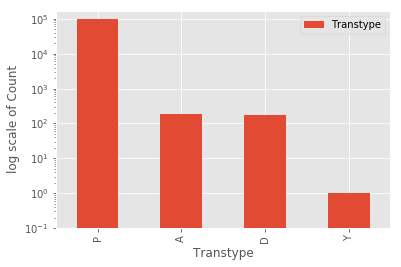

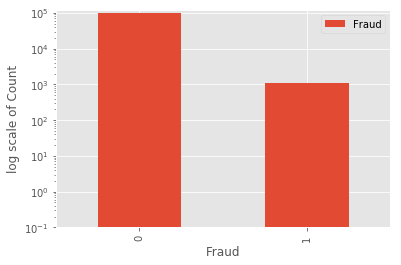

In [0]:
LogScaleCols = ['Merchnum', 'Merch zip', 'Transtype', 'Fraud']
for col in LogScaleCols:
    DF = pd.DataFrame(data[col].value_counts().sort_values(ascending = False).head(20))
    fig = DF.plot(kind = 'bar')
    fig.set_yscale('log')
    plt.xlabel(col)
    plt.ylabel('log scale of Count')
    plt.ylim(0.1)

Text(0.5,0,'Amount (This pic has 99.999% of the data)')

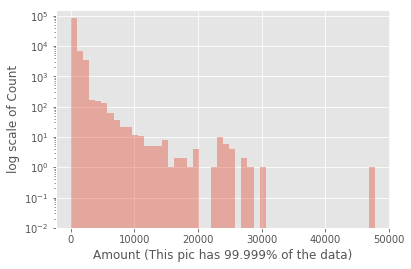

In [0]:
fig = sns.distplot(data.loc[data['Amount'] != max(data['Amount']),'Amount'], kde = False)
fig.set_yscale('log')
plt.ylim(0.01)
plt.ylabel('log scale of Count')
plt.xlabel('Amount (This pic has ' + str(round((len(data['Amount']) - 1)*100/len(data['Amount']),3)) + "% of the data)")

In [0]:
data.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3198
Merch description       0
Merch state          1020
Merch zip            4300
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [0]:
#Remove outlier and filter by transtype P
data = data[(data['Amount'] != max(data['Amount'])) & (data['Transtype'] == 'P')]

In [0]:
data = pd.read_csv('cleaned_card_data.csv')

In [0]:
data.isnull().sum()

Unnamed: 0           0
Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

In [0]:
data['Date'].head(10)[2]

'2010-01-01'

In [0]:
data.dtypes
data['Recnum'] = data['Recnum'].astype('object')
data['Cardnum'] = data['Cardnum'].astype('object')
data['Fraud'] = data['Fraud'].astype('object')
data['Merch zip'] = data['Merch zip'].astype('object')
#datetimeformat = '%Y-%m-%d %H:%M:%S'
#data['Date'] = pd.to_datetime(data['Date'], datetimeformat)

In [0]:
data.dtypes

Unnamed: 0             int64
Recnum                object
Cardnum               object
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip             object
Transtype             object
Amount               float64
Fraud                 object
dtype: object

In [0]:
#Import cleaned data
data = pd.read_excel('transaction_data_cleaned.xlsx')

In [0]:
data.dtypes
data['Recnum'] = data['Recnum'].astype('object')
data['Cardnum'] = data['Cardnum'].astype('object')
data['Fraud'] = data['Fraud'].astype('object')
data['Merch zip'] = data['Merch zip'].astype('object')
#datetimeformat = '%Y-%m-%d %H:%M:%S'
#data['Date'] = pd.to_datetime(data['Date'], datetimeformat)

In [0]:
data.dtypes

Recnum                       object
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                        object
dtype: object

<h3> Variable Creation </h3>

In [0]:
start = time.time()

In [0]:
data_sorted = data

In [0]:
%%time
#Cardnum, Merchnum
for groupbyvar in ['Cardnum', 'Merchnum']:
    data_sorted = data_sorted.sort_values(by = [groupbyvar, 'Date'])
    data_sorted_index = data_sorted.set_index('Date')

    for agg in ['mean', 'max', 'median', 'sum', 'count']: 
        for days in ['1d', '3d', '7d', '14d', '30d']:
            data_sorted[agg + '_' + groupbyvar + "_" + days] = getattr(data_sorted_index.groupby(groupbyvar)['Amount'].rolling(days),agg)().values
            data_sorted['Actual/' + agg + "_" + groupbyvar + "_" + days] = data_sorted['Amount']/data_sorted[agg + '_' + groupbyvar + "_" + days]
    

CPU times: user 1min 44s, sys: 1.03 s, total: 1min 45s
Wall time: 1min 45s


In [0]:
%%time
#Cardnum and Merchnum, Cardnum and Zip, Cardnum and state
for groupbyvar in ['Merchnum', 'Merch zip', 'Merch state']:
    data_sorted = data_sorted.sort_values(by = ['Cardnum',groupbyvar, 'Date'])
    data_sorted_index = data_sorted.set_index('Date')
    for agg in ['mean', 'max', 'median', 'sum', 'count']: 
        for days in ['1d', '3d', '7d', '14d', '30d']:
            data_sorted[agg + '_' + "Cardnum_" + groupbyvar + "_" + days] = getattr(data_sorted_index.groupby(['Cardnum',groupbyvar])['Amount'].rolling(days),agg)().values
            data_sorted['Actual/' + agg + "_" + "Cardnum_" + groupbyvar + "_" + days] = data_sorted['Amount']/data_sorted[agg + '_' + "Cardnum_" + groupbyvar + "_" + days]            


CPU times: user 10min 26s, sys: 9.91 s, total: 10min 36s
Wall time: 10min 34s


In [0]:
data_sorted.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,mean_Cardnum_1d,Actual/mean_Cardnum_1d,mean_Cardnum_3d,Actual/mean_Cardnum_3d,mean_Cardnum_7d,Actual/mean_Cardnum_7d,mean_Cardnum_14d,Actual/mean_Cardnum_14d,mean_Cardnum_30d,Actual/mean_Cardnum_30d,max_Cardnum_1d,Actual/max_Cardnum_1d,max_Cardnum_3d,Actual/max_Cardnum_3d,max_Cardnum_7d,Actual/max_Cardnum_7d,max_Cardnum_14d,Actual/max_Cardnum_14d,max_Cardnum_30d,Actual/max_Cardnum_30d,median_Cardnum_1d,Actual/median_Cardnum_1d,median_Cardnum_3d,Actual/median_Cardnum_3d,median_Cardnum_7d,Actual/median_Cardnum_7d,median_Cardnum_14d,Actual/median_Cardnum_14d,median_Cardnum_30d,Actual/median_Cardnum_30d,sum_Cardnum_1d,Actual/sum_Cardnum_1d,sum_Cardnum_3d,Actual/sum_Cardnum_3d,sum_Cardnum_7d,Actual/sum_Cardnum_7d,sum_Cardnum_14d,Actual/sum_Cardnum_14d,sum_Cardnum_30d,Actual/sum_Cardnum_30d,count_Cardnum_1d,Actual/count_Cardnum_1d,count_Cardnum_3d,Actual/count_Cardnum_3d,count_Cardnum_7d,Actual/count_Cardnum_7d,count_Cardnum_14d,Actual/count_Cardnum_14d,count_Cardnum_30d,Actual/count_Cardnum_30d,mean_Merchnum_1d,Actual/mean_Merchnum_1d,mean_Merchnum_3d,Actual/mean_Merchnum_3d,mean_Merchnum_7d,Actual/mean_Merchnum_7d,mean_Merchnum_14d,Actual/mean_Merchnum_14d,mean_Merchnum_30d,Actual/mean_Merchnum_30d,max_Merchnum_1d,Actual/max_Merchnum_1d,max_Merchnum_3d,Actual/max_Merchnum_3d,max_Merchnum_7d,Actual/max_Merchnum_7d,max_Merchnum_14d,Actual/max_Merchnum_14d,max_Merchnum_30d,Actual/max_Merchnum_30d,median_Merchnum_1d,Actual/median_Merchnum_1d,median_Merchnum_3d,Actual/median_Merchnum_3d,median_Merchnum_7d,Actual/median_Merchnum_7d,median_Merchnum_14d,Actual/median_Merchnum_14d,median_Merchnum_30d,Actual/median_Merchnum_30d,sum_Merchnum_1d,Actual/sum_Merchnum_1d,sum_Merchnum_3d,Actual/sum_Merchnum_3d,sum_Merchnum_7d,Actual/sum_Merchnum_7d,sum_Merchnum_14d,Actual/sum_Merchnum_14d,sum_Merchnum_30d,Actual/sum_Merchnum_30d,count_Merchnum_1d,Actual/count_Merchnum_1d,count_Merchnum_3d,Actual/count_Merchnum_3d,count_Merchnum_7d,Actual/count_Merchnum_7d,count_Merchnum_14d,Actual/count_Merchnum_14d,count_Merchnum_30d,Actual/count_Merchnum_30d,mean_Cardnum_Merchnum_1d,Actual/mean_Cardnum_Merchnum_1d,mean_Cardnum_Merchnum_3d,Actual/mean_Cardnum_Merchnum_3d,mean_Cardnum_Merchnum_7d,Actual/mean_Cardnum_Merchnum_7d,mean_Cardnum_Merchnum_14d,Actual/mean_Cardnum_Merchnum_14d,mean_Cardnum_Merchnum_30d,Actual/mean_Cardnum_Merchnum_30d,max_Cardnum_Merchnum_1d,Actual/max_Cardnum_Merchnum_1d,max_Cardnum_Merchnum_3d,Actual/max_Cardnum_Merchnum_3d,max_Cardnum_Merchnum_7d,Actual/max_Cardnum_Merchnum_7d,max_Cardnum_Merchnum_14d,Actual/max_Cardnum_Merchnum_14d,max_Cardnum_Merchnum_30d,Actual/max_Cardnum_Merchnum_30d,median_Cardnum_Merchnum_1d,Actual/median_Cardnum_Merchnum_1d,median_Cardnum_Merchnum_3d,Actual/median_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d,Actual/median_Cardnum_Merchnum_7d,median_Cardnum_Merchnum_14d,Actual/median_Cardnum_Merchnum_14d,median_Cardnum_Merchnum_30d,Actual/median_Cardnum_Merchnum_30d,sum_Cardnum_Merchnum_1d,Actual/sum_Cardnum_Merchnum_1d,sum_Cardnum_Merchnum_3d,Actual/sum_Cardnum_Merchnum_3d,sum_Cardnum_Merchnum_7d,Actual/sum_Cardnum_Merchnum_7d,sum_Cardnum_Merchnum_14d,Actual/sum_Cardnum_Merchnum_14d,sum_Cardnum_Merchnum_30d,Actual/sum_Cardnum_Merchnum_30d,count_Cardnum_Merchnum_1d,Actual/count_Cardnum_Merchnum_1d,count_Cardnum_Merchnum_3d,Actual/count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,Actual/count_Cardnum_Merchnum_7d,count_Cardnum_Merchnum_14d,Actual/count_Cardnum_Merchnum_14d,count_Cardnum_Merchnum_30d,Actual/count_Cardnum_Merchnum_30d,mean_Cardnum_Merch zip_1d,Actual/mean_Cardnum_Merch zip_1d,mean_Cardnum_Merch zip_3d,Actual/mean_Cardnum_Merch zip_3d,mean_Cardnum_Merch zip_7d,Actual/mean_Cardnum_Merch zip_7d,mean_Cardnum_Merch zip_14d,Actual/mean_Cardnum_Merch zip_14d,mean_Cardnum_Merch zip_30d,Actual/mean_Cardnum_Merch zip_30d,max_Cardnum_Merch zip_1d,Actual/max_Cardnum_Merch zip_1d,max_Cardnum_Merch zip_3d,Actual/max_

In [0]:
data_sorted1 = data_sorted

In [0]:
%%time
#Create days since variables
for groupbyvar in [['Cardnum'], ['Merchnum'], ['Cardnum', 'Merchnum'], ['Cardnum', 'Merch zip'], ['Cardnum', 'Merch state']]:
    sortCols = groupbyvar[:]
    sortCols.append('Date')
    data_sorted1 = data_sorted1.sort_values(by = sortCols)
    if len(groupbyvar) == 1:
        data_sorted1['Days_since_per_' + groupbyvar[0]] = data_sorted1.groupby(groupbyvar)['Date'].apply(lambda x: (x - x.shift(1)).astype('timedelta64[D]')).fillna(365).values 
    else:
        data_sorted1['Days_since_per_Cardnum_' + groupbyvar[1]] = data_sorted1.groupby(groupbyvar)['Date'].apply(lambda x: (x - x.shift(1)).astype('timedelta64[D]')).fillna(365).values 
    

CPU times: user 56.2 s, sys: 1.99 s, total: 58.2 s
Wall time: 55.1 s


In [0]:
data_sorted2 = data_sorted1

In [0]:
%%time
#Velocity Change Var - Cardnum 
data_sorted2 = data_sorted2.sort_values(by = ['Cardnum', 'Date'])
data_sorted2_index = data_sorted2.set_index('Date') 

for days in ['7d', '14d', '30d']:
    data_sorted2["Avg_daily_count_Cardnum_" + days] = getattr(data_sorted2_index.groupby('Cardnum')['count_Cardnum_' + days].rolling(days),'mean')().values
    data_sorted2['Actual/Avg_daily_count_Cardnum_' + days] = data_sorted2['count_Cardnum_1d']/data_sorted2["Avg_daily_count_Cardnum_" + days]
    

CPU times: user 2.45 s, sys: 371 ms, total: 2.82 s
Wall time: 1.63 s


In [0]:
%%time
#Velocity Change Var - Merchnum
data_sorted2 = data_sorted2.sort_values(by = ['Merchnum', 'Date'])
data_sorted2_index = data_sorted2.set_index('Date') 

for days in ['7d', '14d', '30d']:
    data_sorted2["Avg_daily_count_Merchnum_" + days] = getattr(data_sorted2_index.groupby('Merchnum')['count_Merchnum_' + days].rolling(days),'mean')().values
    data_sorted2['Actual/Avg_daily_count_Merchnum_' + days] = data_sorted2['count_Merchnum_1d']/data_sorted2["Avg_daily_count_Merchnum_" + days]
        

CPU times: user 11.2 s, sys: 500 ms, total: 11.7 s
Wall time: 10.5 s


In [0]:
end = time.time()
print (end - start)

807.520859003067


In [0]:
#Test
#data_sorted2[['Recnum', 'Cardnum', 'Merchnum', 'Date', 'count_Card_7d', 'count_Merchant_7d', "Avg_daily_count_Card_7d", "Avg_daily_count_Merchant_7d"]].sort_values(by = ['Merchnum', 'Date'])
data_sorted2.head(50)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,mean_Cardnum_1d,Actual/mean_Cardnum_1d,mean_Cardnum_3d,Actual/mean_Cardnum_3d,mean_Cardnum_7d,Actual/mean_Cardnum_7d,mean_Cardnum_14d,Actual/mean_Cardnum_14d,mean_Cardnum_30d,Actual/mean_Cardnum_30d,max_Cardnum_1d,Actual/max_Cardnum_1d,max_Cardnum_3d,Actual/max_Cardnum_3d,max_Cardnum_7d,Actual/max_Cardnum_7d,max_Cardnum_14d,Actual/max_Cardnum_14d,max_Cardnum_30d,Actual/max_Cardnum_30d,median_Cardnum_1d,Actual/median_Cardnum_1d,median_Cardnum_3d,Actual/median_Cardnum_3d,median_Cardnum_7d,Actual/median_Cardnum_7d,median_Cardnum_14d,Actual/median_Cardnum_14d,median_Cardnum_30d,Actual/median_Cardnum_30d,sum_Cardnum_1d,Actual/sum_Cardnum_1d,sum_Cardnum_3d,Actual/sum_Cardnum_3d,sum_Cardnum_7d,Actual/sum_Cardnum_7d,sum_Cardnum_14d,Actual/sum_Cardnum_14d,sum_Cardnum_30d,Actual/sum_Cardnum_30d,count_Cardnum_1d,Actual/count_Cardnum_1d,count_Cardnum_3d,Actual/count_Cardnum_3d,count_Cardnum_7d,Actual/count_Cardnum_7d,count_Cardnum_14d,Actual/count_Cardnum_14d,count_Cardnum_30d,Actual/count_Cardnum_30d,mean_Merchnum_1d,Actual/mean_Merchnum_1d,mean_Merchnum_3d,Actual/mean_Merchnum_3d,mean_Merchnum_7d,Actual/mean_Merchnum_7d,mean_Merchnum_14d,Actual/mean_Merchnum_14d,mean_Merchnum_30d,Actual/mean_Merchnum_30d,max_Merchnum_1d,Actual/max_Merchnum_1d,max_Merchnum_3d,Actual/max_Merchnum_3d,max_Merchnum_7d,Actual/max_Merchnum_7d,max_Merchnum_14d,Actual/max_Merchnum_14d,max_Merchnum_30d,Actual/max_Merchnum_30d,median_Merchnum_1d,Actual/median_Merchnum_1d,median_Merchnum_3d,Actual/median_Merchnum_3d,median_Merchnum_7d,Actual/median_Merchnum_7d,median_Merchnum_14d,Actual/median_Merchnum_14d,median_Merchnum_30d,Actual/median_Merchnum_30d,sum_Merchnum_1d,Actual/sum_Merchnum_1d,sum_Merchnum_3d,Actual/sum_Merchnum_3d,sum_Merchnum_7d,Actual/sum_Merchnum_7d,sum_Merchnum_14d,Actual/sum_Merchnum_14d,sum_Merchnum_30d,Actual/sum_Merchnum_30d,count_Merchnum_1d,Actual/count_Merchnum_1d,count_Merchnum_3d,Actual/count_Merchnum_3d,count_Merchnum_7d,Actual/count_Merchnum_7d,count_Merchnum_14d,Actual/count_Merchnum_14d,count_Merchnum_30d,Actual/count_Merchnum_30d,mean_Cardnum_Merchnum_1d,Actual/mean_Cardnum_Merchnum_1d,mean_Cardnum_Merchnum_3d,Actual/mean_Cardnum_Merchnum_3d,mean_Cardnum_Merchnum_7d,Actual/mean_Cardnum_Merchnum_7d,mean_Cardnum_Merchnum_14d,Actual/mean_Cardnum_Merchnum_14d,mean_Cardnum_Merchnum_30d,Actual/mean_Cardnum_Merchnum_30d,max_Cardnum_Merchnum_1d,Actual/max_Cardnum_Merchnum_1d,max_Cardnum_Merchnum_3d,Actual/max_Cardnum_Merchnum_3d,max_Cardnum_Merchnum_7d,Actual/max_Cardnum_Merchnum_7d,max_Cardnum_Merchnum_14d,Actual/max_Cardnum_Merchnum_14d,max_Cardnum_Merchnum_30d,Actual/max_Cardnum_Merchnum_30d,median_Cardnum_Merchnum_1d,Actual/median_Cardnum_Merchnum_1d,median_Cardnum_Merchnum_3d,Actual/median_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d,Actual/median_Cardnum_Merchnum_7d,median_Cardnum_Merchnum_14d,Actual/median_Cardnum_Merchnum_14d,median_Cardnum_Merchnum_30d,Actual/median_Cardnum_Merchnum_30d,sum_Cardnum_Merchnum_1d,Actual/sum_Cardnum_Merchnum_1d,sum_Cardnum_Merchnum_3d,Actual/sum_Cardnum_Merchnum_3d,sum_Cardnum_Merchnum_7d,Actual/sum_Cardnum_Merchnum_7d,sum_Cardnum_Merchnum_14d,Actual/sum_Cardnum_Merchnum_14d,sum_Cardnum_Merchnum_30d,Actual/sum_Cardnum_Merchnum_30d,count_Cardnum_Merchnum_1d,Actual/count_Cardnum_Merchnum_1d,count_Cardnum_Merchnum_3d,Actual/count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,Actual/count_Cardnum_Merchnum_7d,count_Cardnum_Merchnum_14d,Actual/count_Cardnum_Merchnum_14d,count_Cardnum_Merchnum_30d,Actual/count_Cardnum_Merchnum_30d,mean_Cardnum_Merch zip_1d,Actual/mean_Cardnum_Merch zip_1d,mean_Cardnum_Merch zip_3d,Actual/mean_Cardnum_Merch zip_3d,mean_Cardnum_Merch zip_7d,Actual/mean_Cardnum_Merch zip_7d,mean_Cardnum_Merch zip_14d,Actual/mean_Cardnum_Merch zip_14d,mean_Cardnum_Merch zip_30d,Actual/mean_Cardnum_Merch zip_30d,max_Cardnum_Merch zip_1d,Actual/max_Cardnum_Merch zip_1d,max_Cardnum_Merch zip_3d,Actual/max_

In [0]:
data_sorted2.shape[1] - data.shape[1]

267

In [0]:
data_sorted2.to_excel('Data_with_all_variables.xlsx')

In [0]:
data_sorted3 = pd.read_excel('Data_with_all_variables.xlsx')

In [0]:
data_sorted3.dtypes

Recnum                                            int64
Cardnum                                           int64
Date                                     datetime64[ns]
Merchnum                                         object
Merch description                                object
Merch state                                      object
Merch zip                                         int64
Transtype                                        object
Amount                                          float64
Fraud                                             int64
mean_Cardnum_1d                                 float64
Actual/mean_Cardnum_1d                          float64
mean_Cardnum_3d                                 float64
Actual/mean_Cardnum_3d                          float64
mean_Cardnum_7d                                 float64
Actual/mean_Cardnum_7d                          float64
mean_Cardnum_14d                                float64
Actual/mean_Cardnum_14d                         

In [0]:
# data_sorted3 = data_sorted2

In [0]:
Weekday = data_sorted3['Date'].dt.weekday_name
Month_name = data_sorted3['Date'].dt.month_name()
Month = data_sorted3['Date'].dt.month

In [0]:
data_sorted3.insert(loc = 3, value = Weekday, column = 'Weekday')
data_sorted3.insert(loc = 4, value = Month, column = 'Month')
data_sorted3.insert(loc = 5, value = Month_name, column = 'Month_name')

In [0]:
data_sorted3.head(10)

,Recnum,Cardnum,Date,Weekday,Month,Month_name,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,mean_Cardnum_1d,Actual/mean_Cardnum_1d,mean_Cardnum_3d,Actual/mean_Cardnum_3d,mean_Cardnum_7d,Actual/mean_Cardnum_7d,mean_Cardnum_14d,Actual/mean_Cardnum_14d,mean_Cardnum_30d,Actual/mean_Cardnum_30d,max_Cardnum_1d,Actual/max_Cardnum_1d,max_Cardnum_3d,Actual/max_Cardnum_3d,max_Cardnum_7d,Actual/max_Cardnum_7d,max_Cardnum_14d,Actual/max_Cardnum_14d,max_Cardnum_30d,Actual/max_Cardnum_30d,median_Cardnum_1d,Actual/median_Cardnum_1d,median_Cardnum_3d,Actual/median_Cardnum_3d,median_Cardnum_7d,Actual/median_Cardnum_7d,median_Cardnum_14d,Actual/median_Cardnum_14d,median_Cardnum_30d,Actual/median_Cardnum_30d,sum_Cardnum_1d,Actual/sum_Cardnum_1d,sum_Cardnum_3d,Actual/sum_Cardnum_3d,sum_Cardnum_7d,Actual/sum_Cardnum_7d,sum_Cardnum_14d,Actual/sum_Cardnum_14d,sum_Cardnum_30d,Actual/sum_Cardnum_30d,count_Cardnum_1d,Actual/count_Cardnum_1d,count_Cardnum_3d,Actual/count_Cardnum_3d,count_Cardnum_7d,Actual/count_Cardnum_7d,count_Cardnum_14d,Actual/count_Cardnum_14d,count_Cardnum_30d,Actual/count_Cardnum_30d,mean_Merchnum_1d,Actual/mean_Merchnum_1d,mean_Merchnum_3d,Actual/mean_Merchnum_3d,mean_Merchnum_7d,Actual/mean_Merchnum_7d,mean_Merchnum_14d,Actual/mean_Merchnum_14d,mean_Merchnum_30d,Actual/mean_Merchnum_30d,max_Merchnum_1d,Actual/max_Merchnum_1d,max_Merchnum_3d,Actual/max_Merchnum_3d,max_Merchnum_7d,Actual/max_Merchnum_7d,max_Merchnum_14d,Actual/max_Merchnum_14d,max_Merchnum_30d,Actual/max_Merchnum_30d,median_Merchnum_1d,Actual/median_Merchnum_1d,median_Merchnum_3d,Actual/median_Merchnum_3d,median_Merchnum_7d,Actual/median_Merchnum_7d,median_Merchnum_14d,Actual/median_Merchnum_14d,median_Merchnum_30d,Actual/median_Merchnum_30d,sum_Merchnum_1d,Actual/sum_Merchnum_1d,sum_Merchnum_3d,Actual/sum_Merchnum_3d,sum_Merchnum_7d,Actual/sum_Merchnum_7d,sum_Merchnum_14d,Actual/sum_Merchnum_14d,sum_Merchnum_30d,Actual/sum_Merchnum_30d,count_Merchnum_1d,Actual/count_Merchnum_1d,count_Merchnum_3d,Actual/count_Merchnum_3d,count_Merchnum_7d,Actual/count_Merchnum_7d,count_Merchnum_14d,Actual/count_Merchnum_14d,count_Merchnum_30d,Actual/count_Merchnum_30d,mean_Cardnum_Merchnum_1d,Actual/mean_Cardnum_Merchnum_1d,mean_Cardnum_Merchnum_3d,Actual/mean_Cardnum_Merchnum_3d,mean_Cardnum_Merchnum_7d,Actual/mean_Cardnum_Merchnum_7d,mean_Cardnum_Merchnum_14d,Actual/mean_Cardnum_Merchnum_14d,mean_Cardnum_Merchnum_30d,Actual/mean_Cardnum_Merchnum_30d,max_Cardnum_Merchnum_1d,Actual/max_Cardnum_Merchnum_1d,max_Cardnum_Merchnum_3d,Actual/max_Cardnum_Merchnum_3d,max_Cardnum_Merchnum_7d,Actual/max_Cardnum_Merchnum_7d,max_Cardnum_Merchnum_14d,Actual/max_Cardnum_Merchnum_14d,max_Cardnum_Merchnum_30d,Actual/max_Cardnum_Merchnum_30d,median_Cardnum_Merchnum_1d,Actual/median_Cardnum_Merchnum_1d,median_Cardnum_Merchnum_3d,Actual/median_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d,Actual/median_Cardnum_Merchnum_7d,median_Cardnum_Merchnum_14d,Actual/median_Cardnum_Merchnum_14d,median_Cardnum_Merchnum_30d,Actual/median_Cardnum_Merchnum_30d,sum_Cardnum_Merchnum_1d,Actual/sum_Cardnum_Merchnum_1d,sum_Cardnum_Merchnum_3d,Actual/sum_Cardnum_Merchnum_3d,sum_Cardnum_Merchnum_7d,Actual/sum_Cardnum_Merchnum_7d,sum_Cardnum_Merchnum_14d,Actual/sum_Cardnum_Merchnum_14d,sum_Cardnum_Merchnum_30d,Actual/sum_Cardnum_Merchnum_30d,count_Cardnum_Merchnum_1d,Actual/count_Cardnum_Merchnum_1d,count_Cardnum_Merchnum_3d,Actual/count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,Actual/count_Cardnum_Merchnum_7d,count_Cardnum_Merchnum_14d,Actual/count_Cardnum_Merchnum_14d,count_Cardnum_Merchnum_30d,Actual/count_Cardnum_Merchnum_30d,mean_Cardnum_Merch zip_1d,Actual/mean_Cardnum_Merch zip_1d,mean_Cardnum_Merch zip_3d,Actual/mean_Cardnum_Merch zip_3d,mean_Cardnum_Merch zip_7d,Actual/mean_Cardnum_Merch zip_7d,mean_Cardnum_Merch zip_14d,Actual/mean_Cardnum_Merch zip_14d,mean_Cardnum_Merch zip_30d,Actual/mean_Cardnum_Merch zip_30d,max_Cardnum_Merch zip_1d,Actual/max_Cardnum_Merch zip_1d,max_Cardnum

In [0]:
WeekdayAggregates = data_sorted3.groupby('Weekday')['Amount'].sum().reset_index()

In [0]:
MonthNameAggregates = data_sorted3.groupby('Month_name')['Amount'].sum().reset_index()
MonthNoAggregates = data_sorted3.groupby('Month')['Amount'].sum().reset_index()

In [0]:
WeekdayAggregates

,Weekday,Amount
0,Friday,1887719.340
1,Monday,7122913.920
2,Saturday,3903352.010
3,Sunday,5832838.100
4,Thursday,3648914.810
5,Tuesday,7880406.190
6,Wednesday,7883426.870


In [0]:
MonthNameAggregates

,Month_name,Amount
0,April,2757667.790
1,August,4692474.120
2,December,2430234.390
3,February,2753296.290
4,January,2406906.720
5,July,3261030.660
6,June,3601096.620
7,March,3474957.390
8,May,3342574.460
9,November,2284558.000


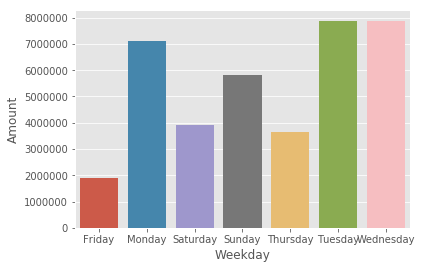

In [0]:
sns.barplot(WeekdayAggregates['Weekday'], WeekdayAggregates['Amount'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

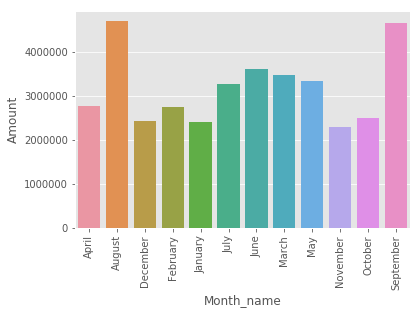

In [0]:
sns.barplot(MonthNameAggregates['Month_name'],MonthNameAggregates['Amount'])
plt.xticks(rotation = 90)

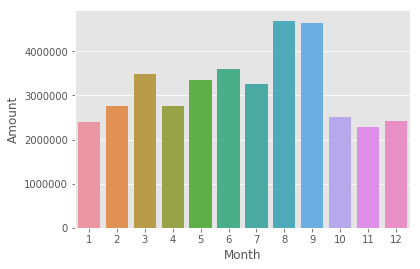

In [0]:
sns.barplot(MonthNoAggregates['Month'],MonthNoAggregates['Amount'])

In [0]:
ZipState = pd.read_csv('free-zipcode-database2.csv')

In [0]:
ZipState['FullZIP'] = ZipState['FullZIP'].astype('object')

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
ZipState = ZipState.drop_duplicates()

In [0]:
data['Merch state'].isnull().sum()

1195

In [0]:
StateMissingSubset = data[(data['Merch state'].isnull() == True) & (data['Merch zip'].isnull() == False)]

In [0]:
StateFilled = StateMissingSubset.merge(ZipState, how = 'inner', left_on = 'Merch zip', right_on = 'FullZIP')
StateFilled = StateFilled.drop(['Merch state'], axis = 1)

In [0]:
MerchState = StateFilled['State']
StateFilled.insert(5, 'Merch state', MerchState)

In [0]:
StateFilled = StateFilled.sort_values(by = 'Recnum')

In [0]:
StateFilled['Merch state']

0     PR
1     PR
2     PR
3     PR
7     PR
8     PR
4     PR
5     PR
6     PR
9     PR
10    PR
11    PR
12    PR
13    PR
14    PR
15    PR
17    PR
18    PR
21    CA
22    CA
23    TX
24    PR
25    CA
26    PR
27    PR
28    PR
29    PR
30    PR
31    PR
32    PR
33    PR
34    PR
35    PR
37    NY
36    PR
38    NY
39    NY
42    PR
43    PR
19    PR
20    PR
44    PR
45    PR
46    PR
47    PR
48    PR
40    NY
41    NY
49    VI
50    VI
51    GA
52    TN
53    TN
54    TN
16    PR
55    KY
Name: Merch state, dtype: object

In [0]:
data.loc[(data['Merch state'].isnull() == True) & (data['Merch zip'].isnull() == False), 'Merch state'] = StateFilled.loc[:,'Merch state']

In [0]:
data.loc[(data['Merch state'].isnull() == True) & (data['Merch zip'].isnull() == False), 'Merch state'].merge(StateFilled)

3258     NaN
3262     NaN
3540     NaN
3642     NaN
4969     NaN
5229     NaN
5636     NaN
5900     NaN
6030     NaN
6136     NaN
12152    NaN
13558    NaN
15019    NaN
15124    NaN
19330    NaN
23374    NaN
23490    NaN
23620    NaN
24185    NaN
24226    NaN
24283    NaN
24297    NaN
25271    NaN
25442    NaN
25487    NaN
26816    NaN
26922    NaN
31712    NaN
36538    NaN
36789    NaN
38034    NaN
39023    NaN
41267    NaN
43466    NaN
44407    NaN
44563    NaN
46054    NaN
47198    NaN
50127    NaN
51057    NaN
51883    NaN
52186    NaN
56632    NaN
56943    NaN
57296    NaN
57661    NaN
57794    NaN
57981    NaN
58138    NaN
59094    NaN
59270    NaN
59479    NaN
59582    NaN
59825    NaN
59832    NaN
59908    NaN
60003    NaN
60035    NaN
60168    NaN
60207    NaN
60243    NaN
60338    NaN
60596    NaN
60901    NaN
61417    NaN
61430    NaN
62420    NaN
62657    NaN
64882    NaN
65084    NaN
66157    NaN
66182    NaN
66252    NaN
69422    NaN
70551    NaN
70588    NaN
72400    NaN

In [0]:
StateFilled['Merch state']

0     PR
1     PR
2     PR
3     PR
7     PR
8     PR
4     PR
5     PR
6     PR
9     PR
10    PR
11    PR
12    PR
13    PR
14    PR
15    PR
17    PR
18    PR
21    CA
22    CA
23    TX
24    PR
25    CA
26    PR
27    PR
28    PR
29    PR
30    PR
31    PR
32    PR
33    PR
34    PR
35    PR
37    NY
36    PR
38    NY
39    NY
42    PR
43    PR
19    PR
20    PR
44    PR
45    PR
46    PR
47    PR
48    PR
40    NY
41    NY
49    VI
50    VI
51    GA
52    TN
53    TN
54    TN
16    PR
55    KY
Name: Merch state, dtype: object

In [0]:
data = data_sorted3[data_sorted3['Date'] <= '2010-10-31']

In [0]:
mydata = data.drop(['Cardnum', 'Date','Merchnum','Merch state','Merch zip','Transtype'], axis = 1)

In [0]:
mydata.head(10)

,Recnum,Weekday,Month,Month_name,Merch description,Amount,Fraud,mean_Cardnum_1d,Actual/mean_Cardnum_1d,mean_Cardnum_3d,Actual/mean_Cardnum_3d,mean_Cardnum_7d,Actual/mean_Cardnum_7d,mean_Cardnum_14d,Actual/mean_Cardnum_14d,mean_Cardnum_30d,Actual/mean_Cardnum_30d,max_Cardnum_1d,Actual/max_Cardnum_1d,max_Cardnum_3d,Actual/max_Cardnum_3d,max_Cardnum_7d,Actual/max_Cardnum_7d,max_Cardnum_14d,Actual/max_Cardnum_14d,max_Cardnum_30d,Actual/max_Cardnum_30d,median_Cardnum_1d,Actual/median_Cardnum_1d,median_Cardnum_3d,Actual/median_Cardnum_3d,median_Cardnum_7d,Actual/median_Cardnum_7d,median_Cardnum_14d,Actual/median_Cardnum_14d,median_Cardnum_30d,Actual/median_Cardnum_30d,sum_Cardnum_1d,Actual/sum_Cardnum_1d,sum_Cardnum_3d,Actual/sum_Cardnum_3d,sum_Cardnum_7d,Actual/sum_Cardnum_7d,sum_Cardnum_14d,Actual/sum_Cardnum_14d,sum_Cardnum_30d,Actual/sum_Cardnum_30d,count_Cardnum_1d,Actual/count_Cardnum_1d,count_Cardnum_3d,Actual/count_Cardnum_3d,count_Cardnum_7d,Actual/count_Cardnum_7d,count_Cardnum_14d,Actual/count_Cardnum_14d,count_Cardnum_30d,Actual/count_Cardnum_30d,mean_Merchnum_1d,Actual/mean_Merchnum_1d,mean_Merchnum_3d,Actual/mean_Merchnum_3d,mean_Merchnum_7d,Actual/mean_Merchnum_7d,mean_Merchnum_14d,Actual/mean_Merchnum_14d,mean_Merchnum_30d,Actual/mean_Merchnum_30d,max_Merchnum_1d,Actual/max_Merchnum_1d,max_Merchnum_3d,Actual/max_Merchnum_3d,max_Merchnum_7d,Actual/max_Merchnum_7d,max_Merchnum_14d,Actual/max_Merchnum_14d,max_Merchnum_30d,Actual/max_Merchnum_30d,median_Merchnum_1d,Actual/median_Merchnum_1d,median_Merchnum_3d,Actual/median_Merchnum_3d,median_Merchnum_7d,Actual/median_Merchnum_7d,median_Merchnum_14d,Actual/median_Merchnum_14d,median_Merchnum_30d,Actual/median_Merchnum_30d,sum_Merchnum_1d,Actual/sum_Merchnum_1d,sum_Merchnum_3d,Actual/sum_Merchnum_3d,sum_Merchnum_7d,Actual/sum_Merchnum_7d,sum_Merchnum_14d,Actual/sum_Merchnum_14d,sum_Merchnum_30d,Actual/sum_Merchnum_30d,count_Merchnum_1d,Actual/count_Merchnum_1d,count_Merchnum_3d,Actual/count_Merchnum_3d,count_Merchnum_7d,Actual/count_Merchnum_7d,count_Merchnum_14d,Actual/count_Merchnum_14d,count_Merchnum_30d,Actual/count_Merchnum_30d,mean_Cardnum_Merchnum_1d,Actual/mean_Cardnum_Merchnum_1d,mean_Cardnum_Merchnum_3d,Actual/mean_Cardnum_Merchnum_3d,mean_Cardnum_Merchnum_7d,Actual/mean_Cardnum_Merchnum_7d,mean_Cardnum_Merchnum_14d,Actual/mean_Cardnum_Merchnum_14d,mean_Cardnum_Merchnum_30d,Actual/mean_Cardnum_Merchnum_30d,max_Cardnum_Merchnum_1d,Actual/max_Cardnum_Merchnum_1d,max_Cardnum_Merchnum_3d,Actual/max_Cardnum_Merchnum_3d,max_Cardnum_Merchnum_7d,Actual/max_Cardnum_Merchnum_7d,max_Cardnum_Merchnum_14d,Actual/max_Cardnum_Merchnum_14d,max_Cardnum_Merchnum_30d,Actual/max_Cardnum_Merchnum_30d,median_Cardnum_Merchnum_1d,Actual/median_Cardnum_Merchnum_1d,median_Cardnum_Merchnum_3d,Actual/median_Cardnum_Merchnum_3d,median_Cardnum_Merchnum_7d,Actual/median_Cardnum_Merchnum_7d,median_Cardnum_Merchnum_14d,Actual/median_Cardnum_Merchnum_14d,median_Cardnum_Merchnum_30d,Actual/median_Cardnum_Merchnum_30d,sum_Cardnum_Merchnum_1d,Actual/sum_Cardnum_Merchnum_1d,sum_Cardnum_Merchnum_3d,Actual/sum_Cardnum_Merchnum_3d,sum_Cardnum_Merchnum_7d,Actual/sum_Cardnum_Merchnum_7d,sum_Cardnum_Merchnum_14d,Actual/sum_Cardnum_Merchnum_14d,sum_Cardnum_Merchnum_30d,Actual/sum_Cardnum_Merchnum_30d,count_Cardnum_Merchnum_1d,Actual/count_Cardnum_Merchnum_1d,count_Cardnum_Merchnum_3d,Actual/count_Cardnum_Merchnum_3d,count_Cardnum_Merchnum_7d,Actual/count_Cardnum_Merchnum_7d,count_Cardnum_Merchnum_14d,Actual/count_Cardnum_Merchnum_14d,count_Cardnum_Merchnum_30d,Actual/count_Cardnum_Merchnum_30d,mean_Cardnum_Merch zip_1d,Actual/mean_Cardnum_Merch zip_1d,mean_Cardnum_Merch zip_3d,Actual/mean_Cardnum_Merch zip_3d,mean_Cardnum_Merch zip_7d,Actual/mean_Cardnum_Merch zip_7d,mean_Cardnum_Merch zip_14d,Actual/mean_Cardnum_Merch zip_14d,mean_Cardnum_Merch zip_30d,Actual/mean_Cardnum_Merch zip_30d,max_Cardnum_Merch zip_1d,Actual/max_Cardnum_Merch zip_1d,max_Cardnum_Merch zip_3d,Actual/max_Cardnum_Merch zip_3d,max_Card

In [0]:
KS = pd.DataFrame(np.zeros((270,3)))
i=0
for column in mydata:
    print(i,column)
    KS.loc[i,0] = column
    i=i+1
KS

0 Recnum
1 Weekday
2 Month
3 Month_name
4 Merch description
5 Amount
6 Fraud
7 mean_Cardnum_1d
8 Actual/mean_Cardnum_1d
9 mean_Cardnum_3d
10 Actual/mean_Cardnum_3d
11 mean_Cardnum_7d
12 Actual/mean_Cardnum_7d
13 mean_Cardnum_14d
14 Actual/mean_Cardnum_14d
15 mean_Cardnum_30d
16 Actual/mean_Cardnum_30d
17 max_Cardnum_1d
18 Actual/max_Cardnum_1d
19 max_Cardnum_3d
20 Actual/max_Cardnum_3d
21 max_Cardnum_7d
22 Actual/max_Cardnum_7d
23 max_Cardnum_14d
24 Actual/max_Cardnum_14d
25 max_Cardnum_30d
26 Actual/max_Cardnum_30d
27 median_Cardnum_1d
28 Actual/median_Cardnum_1d
29 median_Cardnum_3d
30 Actual/median_Cardnum_3d
31 median_Cardnum_7d
32 Actual/median_Cardnum_7d
33 median_Cardnum_14d
34 Actual/median_Cardnum_14d
35 median_Cardnum_30d
36 Actual/median_Cardnum_30d
37 sum_Cardnum_1d
38 Actual/sum_Cardnum_1d
39 sum_Cardnum_3d
40 Actual/sum_Cardnum_3d
41 sum_Cardnum_7d
42 Actual/sum_Cardnum_7d
43 sum_Cardnum_14d
44 Actual/sum_Cardnum_14d
45 sum_Cardnum_30d
46 Actual/sum_Cardnum_30d
47 count_C

,0,1,2
0,Recnum,0.000,0.000
1,Weekday,0.000,0.000
2,Month,0.000,0.000
3,Month_name,0.000,0.000
4,Merch description,0.000,0.000
5,Amount,0.000,0.000
6,Fraud,0.000,0.000
7,mean_Cardnum_1d,0.000,0.000
8,Actual/mean_Cardnum_1d,0.000,0.000
9,mean_Cardnum_3d,0.000,0.000


In [0]:
KS.columns = ['field','ks','FDR']
KS

,field,ks,FDR
0,Recnum,0.000,0.000
1,Weekday,0.000,0.000
2,Month,0.000,0.000
3,Month_name,0.000,0.000
4,Merch description,0.000,0.000
5,Amount,0.000,0.000
6,Fraud,0.000,0.000
7,mean_Cardnum_1d,0.000,0.000
8,Actual/mean_Cardnum_1d,0.000,0.000
9,mean_Cardnum_3d,0.000,0.000


In [0]:
import scipy.stats as sps

In [0]:
goods = mydata[mydata['Fraud'] ==0]
goods.shape

(83090, 274)

In [0]:
bads = mydata[mydata['Fraud'] ==1]
bads.shape

(880, 274)

In [0]:
numgoods = len(goods)
numbads = len(bads)

In [0]:
%%time
i=0
for column in mydata:
    KS['ks'][i] = sps.ks_2samp(goods[column],bads[column])[0]
    i=i+1

/Users/User/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 14.4 s, sys: 171 ms, total: 14.6 s
Wall time: 14.7 s


In [0]:
KS

,field,ks,FDR
0,Recnum,0.222,0.000
1,Weekday,0.078,0.000
2,Month,0.195,0.000
3,Month_name,0.122,0.000
4,Merch description,0.105,0.000
5,Amount,0.544,0.000
6,Fraud,1.000,0.000
7,mean_Cardnum_1d,0.566,0.000
8,Actual/mean_Cardnum_1d,0.168,0.000
9,mean_Cardnum_3d,0.571,0.000


In [0]:
KS.sort_values(by=['ks'], ascending = False, inplace = True)
KS

,field,ks,FDR
6,Fraud,1.000,0.000
141,sum_Cardnum_Merchnum_7d,0.679,0.000
191,sum_Cardnum_Merch zip_7d,0.675,0.000
143,sum_Cardnum_Merchnum_14d,0.674,0.000
241,sum_Cardnum_Merch state_7d,0.665,0.000
193,sum_Cardnum_Merch zip_14d,0.664,0.000
139,sum_Cardnum_Merchnum_3d,0.663,0.000
239,sum_Cardnum_Merch state_3d,0.663,0.000
189,sum_Cardnum_Merch zip_3d,0.662,0.000
243,sum_Cardnum_Merch state_14d,0.659,0.000


In [0]:
%%time 
topRows = int(round(len(mydata)*0.03))
j=0
for column in mydata:
    temp1 = mydata.sort_values(column, ascending = False).head(topRows)
    temp2 = mydata.sort_values(column, ascending = True).head(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KS.loc[j, 'FDR'] = FDRate
    j=j+1

CPU times: user 1min 1s, sys: 38.8 s, total: 1min 40s
Wall time: 1min 40s


In [0]:
KS.sort_values(by=['ks'], ascending=False, inplace=True)
KS

,field,ks,FDR
6,Fraud,1.000,1.000
141,sum_Cardnum_Merchnum_7d,0.679,0.637
191,sum_Cardnum_Merch zip_7d,0.675,0.633
143,sum_Cardnum_Merchnum_14d,0.674,0.630
241,sum_Cardnum_Merch state_7d,0.665,0.620
193,sum_Cardnum_Merch zip_14d,0.664,0.623
139,sum_Cardnum_Merchnum_3d,0.663,0.609
239,sum_Cardnum_Merch state_3d,0.663,0.600
189,sum_Cardnum_Merch zip_3d,0.662,0.610
243,sum_Cardnum_Merch state_14d,0.659,0.536


In [0]:
KS.to_csv("KS.csv")

In [0]:
len(KS['field'].tolist())

274

In [0]:
#Select half of the features based on the top KS scores
DataAfterFilter = mydata.loc[:,KS['field'].head(int(KS.shape[0]/2)).tolist()]

In [0]:
DataAfterFilter.shape

(83970, 137)

In [0]:
NewData = DataAfterFilter

In [0]:
NewDataX = NewData.loc[:,NewData.columns != 'Fraud']
NewDataY = NewData.loc[:,'Fraud']

In [0]:
DataAfterFilter.shape

(83970, 137)

In [0]:
%%time
SelectNfeatures = 20
Model = LogisticRegression(random_state = 10)
rfe = RFE(estimator= Model, n_features_to_select= SelectNfeatures)
rfe = rfe.fit(NewDataX, NewDataY)
featureranking = rfe.ranking_

CPU times: user 29min 9s, sys: 4.96 s, total: 29min 14s
Wall time: 29min 16s


In [0]:
featureranking

array([ 46,  92, 116,  86,  32,  91, 105,  89,  53,  69,   1,  94,  15,
         1,  38,  76,  67,  66,  59,  65, 101,  54,  40,  79,  60,  93,
        56,  49, 115,   6,   7,  36,  51, 107,  41,  35,  24,  90,  74,
        97,  61,  33,  47,  72,  99,  18,  13, 117, 104,  30, 109,  34,
       113, 100,  62,  80,   9,  83,  73, 114,  28,  75,  42,  12,  68,
        78,  27,  77,  57,  23,  88, 111,  52,  31,  70,  96,  64,  37,
        85,  39, 110,  50, 108,  44, 112,   8,  71,  48,  16,  98,  55,
        43,  21,  82,  58, 103,  45,  26,  95,  84,  81,   1,   1,   1,
        25,   2,   4,  20,  10,   1,   1,   1,   1,   1,  29,   1,   1,
        11,   1,   1, 106,  14,   1,   1,   3, 102,   1,   1,   5,  19,
        22,  17,   1,  63,   1,  87])

In [0]:
FeaturesAfterWrapper = []
for elem in list(zip(featureranking, NewDataX.columns)):
    if elem[0] == 1:
        FeaturesAfterWrapper.append(elem[1])

In [0]:
FeaturesAfterWrapper.append('Fraud')

In [0]:
sorted(FeaturesAfterWrapper)

['Actual/mean_Cardnum_30d',
 'Actual/mean_Merchnum_14d',
 'Actual/mean_Merchnum_30d',
 'Actual/mean_Merchnum_7d',
 'Actual/median_Merchnum_30d',
 'Actual/sum_Cardnum_Merch state_3d',
 'Actual/sum_Cardnum_Merch zip_3d',
 'Actual/sum_Cardnum_Merchnum_3d',
 'Avg_daily_count_Cardnum_14d',
 'Avg_daily_count_Cardnum_7d',
 'Fraud',
 'count_Cardnum_14d',
 'count_Cardnum_1d',
 'count_Cardnum_3d',
 'count_Cardnum_7d',
 'count_Cardnum_Merch state_3d',
 'count_Cardnum_Merch zip_3d',
 'count_Cardnum_Merch zip_7d',
 'count_Cardnum_Merchnum_14d',
 'max_Cardnum_Merchnum_14d',
 'max_Cardnum_Merchnum_30d']

In [0]:
NewData2 = DataAfterFilter[FeaturesAfterWrapper]

In [0]:
NewData2.to_csv('TransactionDataWith20ImportantFeatures.csv')

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(NewData2.loc[:,NewData2.columns != 'Fraud'], NewData2['Fraud'], test_size = 0.3, random_state = 10)

In [0]:
random_state = 10
MLModels = [LogisticRegression(random_state = 10),KNeighborsClassifier(), DecisionTreeClassifier(random_state= random_state), RandomForestClassifier(random_state = 10), GradientBoostingClassifier(random_state = 10), AdaBoostClassifier(random_state = 10), MLPClassifier(random_state = 10)]
ClassifierAlgos = ['Logistic Regression', 'kNN', 'Decision Tree','Random Forest', 'Gradient Boosting', 'AdaBoost', 'Neural Network']
classifiers = zip(MLModels, ClassifierAlgos)

In [0]:
OOTData = data_sorted3[data_sorted3['Date'] > '2010-10-31']
OOTData = OOTData[FeaturesAfterWrapper]

In [0]:
OOTData.head(10)

,max_Cardnum_Merchnum_14d,max_Cardnum_Merchnum_30d,Avg_daily_count_Cardnum_7d,count_Cardnum_7d,count_Cardnum_3d,Actual/mean_Cardnum_30d,Actual/sum_Cardnum_Merch state_3d,count_Cardnum_Merch state_3d,count_Cardnum_14d,Actual/mean_Merchnum_7d,count_Cardnum_Merch zip_7d,Actual/mean_Merchnum_30d,Actual/mean_Merchnum_14d,Actual/median_Merchnum_30d,count_Cardnum_1d,count_Cardnum_Merchnum_14d,Avg_daily_count_Cardnum_14d,Actual/sum_Cardnum_Merchnum_3d,Actual/sum_Cardnum_Merch zip_3d,count_Cardnum_Merch zip_3d,Fraud
84000,300.000,300.000,10.000,12,1,0.021,1.000,1,19,0.234,4,0.111,0.204,0.247,1,4,16.700,1.000,1.000,1,0
84115,300.000,300.000,10.429,16,5,0.023,0.500,2,23,0.238,5,0.112,0.207,0.248,5,5,17.000,0.500,0.500,2,0
84145,300.000,300.000,10.933,18,7,0.024,0.333,3,25,0.242,6,0.113,0.209,0.249,7,6,17.364,0.333,0.333,3,0
84092,1696.000,1696.000,1.000,1,1,0.954,1.000,1,2,5.424,1,2.779,4.941,6.193,1,1,1.500,1.000,1.000,1,0
84084,464.900,464.900,2.000,2,1,1.339,1.000,1,3,1.456,1,0.755,1.334,1.673,1,2,2.000,1.000,1.000,1,0
84072,466.810,466.810,1.500,2,2,0.064,1.000,1,8,0.127,1,0.065,0.115,0.144,1,2,9.125,1.000,1.000,1,0
84387,2040.000,2040.000,2.000,2,1,2.808,1.000,1,3,5.100,1,3.320,6.101,7.418,1,1,3.333,1.000,1.000,1,0
84228,364.470,364.470,2.000,2,2,0.741,1.000,1,5,0.913,1,0.595,1.089,1.319,2,1,2.750,1.000,1.000,1,0
84245,559.480,559.480,2.500,3,3,1.116,0.606,2,6,1.387,2,0.913,1.656,2.015,3,2,3.400,0.606,0.606,2,0
84187,76.000,76.000,1.000,1,1,0.071,1.000,1,4,0.192,1,0.125,0.227,0.275,1,1,3.250,1.000,1.000,1,0


In [0]:
OOT_Test_Y = OOTData['Fraud']
OOT_Test_X = OOTData.loc[:,OOTData.columns != 'Fraud']

In [0]:
X_train.columns

Index(['max_Cardnum_Merchnum_14d', 'max_Cardnum_Merchnum_30d',
       'Avg_daily_count_Cardnum_7d', 'count_Cardnum_7d', 'count_Cardnum_3d',
       'Actual/mean_Cardnum_30d', 'Actual/sum_Cardnum_Merch state_3d',
       'count_Cardnum_Merch state_3d', 'count_Cardnum_14d',
       'Actual/mean_Merchnum_7d', 'count_Cardnum_Merch zip_7d',
       'Actual/mean_Merchnum_30d', 'Actual/mean_Merchnum_14d',
       'Actual/median_Merchnum_30d', 'count_Cardnum_1d',
       'count_Cardnum_Merchnum_14d', 'Avg_daily_count_Cardnum_14d',
       'Actual/sum_Cardnum_Merchnum_3d', 'Actual/sum_Cardnum_Merch zip_3d',
       'count_Cardnum_Merch zip_3d'],
      dtype='object')

In [0]:
for model, modelname in classifiers:
    Model = model
    FitModel = Model.fit(X_train, Y_train)
    ModelPredict = FitModel.predict(X_test)
    display (confusion_matrix(Y_test, ModelPredict))
    ModelPredictOOT = FitModel.predict(OOT_Test_X)

array([[24926,    11],
       [  234,    20]])

array([[24894,    43],
       [  118,   136]])

array([[24803,   134],
       [   93,   161]])

array([[24926,    11],
       [  122,   132]])

array([[24912,    25],
       [  117,   137]])

array([[24915,    22],
       [  160,    94]])

array([[24934,     3],
       [  249,     5]])